### Python Chilla Data Cleaning Notebook
##### Ali Nawaz
##### Artificial Intelligence Engineer at NUST
##### Education : Master in Software Engineering

In [98]:
import plotly.express as px
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_chilla_data.csv')
df.head(2)

,sex,location,age_limit,qaulification,subject,purpose,employment,blood,SIM_company,sim,...,programming,marital_status,vaccinated,living_place,experience,age,weight,height,coding_duration,loadsheeding
0,Male,Pakistan,36-40,Masters,Natural Sciences,to boost my skill set,Unemplyed,B+,U-fone,Prepaid,...,Python,1,Yes,Urbun,5.0,38.0,179.0,5.0,3.0,2
1,Male,Pakistan,26-30,Bachelors,IT,to boost my skill set,Student,B+,U-fone,Prepaid,...,Python,0,Yes,Urbun,1.0,25.0,178.0,1.0,2.0,6


In [9]:
# # rename_col_name
# df.rename(columns={'Qualification_completed': 'Qaulification', 'field_of_study': 'Subject',
# 'Purpose_for_chilla': 'purpose','What are you?': 'Employment','Blood group ':'Blood','Which mobile sim do you use': 'SIM_company','Prepaid or Postpaid': 'SIM_type',
# 'Your favorite programming language?':'Programming_language','Marital Status?':'Marital_status','Are you Vaccinated?':'Vaccinated',
# 'Where do you live?':'living_place','Research/Working experience (Float/Int) years':'experience','Age (years)-Float/Int':'Age',
# 'Your Weight in kg? (float)':'Weight','Height in cm? Freelancer- (Float)':'Height','How many hours you code a day? (int) e.g: 5,4,3':'Code_deuration',
# 'Light kitni der band hti hy? int':'Loadsheeding'}, inplace = True)

In [99]:
# df = df.replace({'Age' : { 36-40 : 38, 26-30 : 28, 31-35 : 33, 21-25 : 23, 16-20 : 16 }})
# df['Age'] = df['Age'].str.replace('36-40','38') other way to change
# df = df.replace({'marital_status' : { 'Yes' : 1, 'No' : 0}})
# df.housing.map(dict(yes=1, no=0))

df['experience'] = df['experience'].astype(float)#.apply(pd.to_numeric)
# df['experience'] = pd.to_numeric(df['experience'], downcast='float')
df['age'] = df['age'].astype(float)
df['weight'] = df['weight'].astype(float)
df['height'] = df['height'].astype(float)
df['coding_duration'] = df['coding_duration'].astype(float)
df['loadsheeding'] = df['loadsheeding'].astype(float)
# df.drop('age_limit', axis=1, inplace=True)
df.to_csv("cleaned_chilla_data.csv", index=False)

In [100]:
df.head(5)

,sex,location,age_limit,qaulification,subject,purpose,employment,blood,SIM_company,sim,...,programming,marital_status,vaccinated,living_place,experience,age,weight,height,coding_duration,loadsheeding
0,Male,Pakistan,36-40,Masters,Natural Sciences,to boost my skill set,Unemplyed,B+,U-fone,Prepaid,...,Python,1,Yes,Urbun,5.0,38.00,179.000,5.0,3.0,2.0
1,Male,Pakistan,26-30,Bachelors,IT,to boost my skill set,Student,B+,U-fone,Prepaid,...,Python,0,Yes,Urbun,1.0,25.00,178.000,1.0,2.0,6.0
2,Male,Pakistan,31-35,Masters,Enginnering,Switch my field of study,Employed,B+,Zong,Prepaid,...,Python,1,Yes,Urbun,5.5,31.34,173.000,5.5,2.0,0.0
3,Female,Pakistan,31-35,Masters,IT,to boost my skill set,Employed,O+,U-fone,Postpaid,...,Python,1,Yes,Urbun,5.0,33.00,157.000,5.0,3.0,24.0
4,Female,Pakistan,26-30,Masters,Enginnering,to boost my skill set,Student,A-,Mobilink,Prepaid,...,Javascript,0,Yes,Rural,3.5,27.00,164.544,3.5,6.0,12.0


In [75]:

fig = px.ecdf(df, x="coding_duration", color="sex")
fig.show()

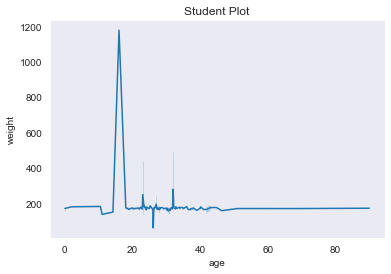

In [76]:
sns.lineplot(x='age', y = "weight", data=df)
plt.title("Student Plot")
plt.show()

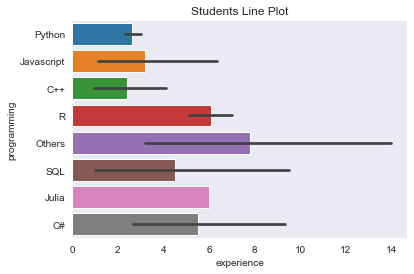

In [77]:
sns.barplot(x='experience', y = "programming", data=df, saturation=0.8)
sns.set_style('dark')
plt.title("Students Line Plot")
plt.show()

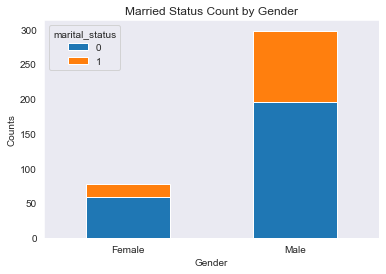

In [78]:
dff = df[['sex', 'marital_status']]

# create a pivot table
dfp = dff.pivot_table(index='sex', columns=['marital_status'], aggfunc=len)

# plot the dataframe
dfp.plot(kind='bar', stacked=True, ylabel='Counts', xlabel='Gender',
         title='Married Status Count by Gender', rot=0)

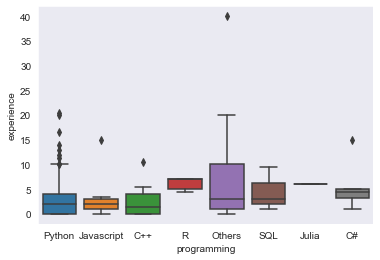

In [79]:
sns.boxplot(x='programming', y = "experience", data=df)


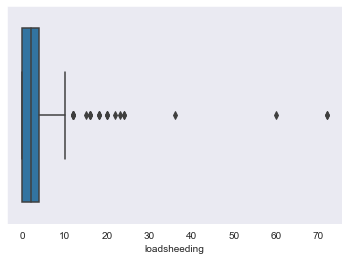

In [80]:
sns.boxplot(x=df['loadsheeding'])


Text(0.5, 1.0, 'Varation Between Course Student in Terms of Experience and Subject')

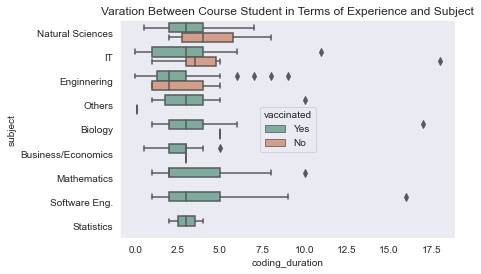

In [81]:
sns.boxplot(x='coding_duration', y = "subject", data=df, hue='vaccinated', palette= 'Set2', dodge=True,  saturation=0.5)
plt.title("Varation Between Course Student in Terms of Experience and Subject")

In [82]:
fig = px.scatter(df, x="experience", y="coding_duration", color="living_place", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [83]:
# df = df.query("weight == 178.0").query("living_place == 'Urban'")
# df.loc[df['experience'] < 2.0, 'programming'] = 'employment' # Represent only large countries
fig = px.pie(df, values='experience', names='programming', title='Ecperince with your Most Favorite Programming Language ')
fig.show()

In [84]:
fig = px.sunburst(df, path=['employment', 'qaulification'], values='coding_duration',
                  color='experience', hover_data=['location'])
fig.show()

In [85]:
fig = px.violin(df, y="experience", x="vaccinated", color="sex", box=True, points="all", hover_data=df.columns)
fig.show()


In [86]:
fig = px.scatter(df, x="weight", y="height", color="SIM_company")
fig.show()

In [87]:
fig = px.bar(df, x="subject", y="experience", color="pc",
             pattern_shape="pc", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [90]:
fig = px.parallel_categories(df, color="age", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [96]:
fig = px.bar_polar(df, r="age_limit", theta="subject", color="age_limit", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [97]:
fig = px.line(df, x='experience', y='age', color='subject', markers=True)
fig.show()

In [102]:
fig = px.scatter_3d(df, x='age', y='experience', z='coding_duration',
              color='subject')
fig.show()